# series

In [1]:
import tensorflow as tf
import numpy as np
import json
import os
import matplotlib.pyplot as plt


In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

In [3]:
server = True
if server:
    series_path = path + '/breakout/results_200228/series/series.npz'
    obs_path = path + '/breakout/results_200228/record'
    vae_path = path + '/breakout/results_200228/tf_vae'


In [4]:
def load_raw_data_list(filelist):
  data_list = []
  action_list = []
  counter = 0
  for i in range(len(filelist)):
    filename = filelist[i]
    raw_data = np.load(os.path.join(obs_path, filename))
    data_list.append(raw_data['obs'])
    action_list.append(raw_data['action'])
    if ((i+1) % 1000 == 0):
      print("loading file", (i+1))
  return data_list, action_list

In [5]:
filelist = os.listdir(obs_path)
filelist.sort()
filelist = filelist[0:10]

dataset, action_dataset = load_raw_data_list(filelist)
dataset[0][0].shape

(64, 64, 3)

In [6]:
vae = ConvVAE()
vae.load_json(vae_path + '/vae.json')

INFO:tensorflow:Model using gpu.


In [7]:
mu, logvar = vae.encode_mu_logvar(dataset[0])

In [8]:
z = (mu + np.exp(logvar/2.0) * np.random.randn(*logvar.shape))

In [9]:
z.shape

(400, 32)

In [10]:
z_dec = vae.decode(z)
z_dec.shape

(400, 64, 64, 3)

0.90080297

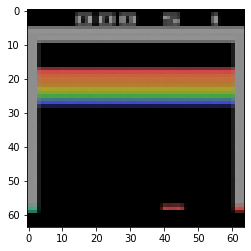

In [11]:
plt.imshow(z_dec[0])
z_dec.max()

In [12]:
z_2 = vae.encode(dataset[0])
z_2_dec = vae.decode(z_2)

0.88290876

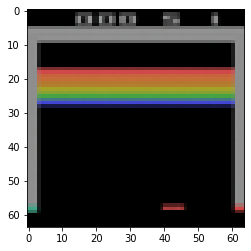

In [13]:
plt.imshow(z_2_dec[0])
z_2_dec.max()